In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [27]:
df = pd.read_csv('drive/Shareddrives/DS340W Project/PopularityPrediction-main/INSTAGRAM FILES/merged_file_insta1.csv')

In [28]:
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,True,True,True,False,1,False,False,False,False,cyan,...,46,HIGH,0,0,0,0,0,1,0,0
1,False,True,True,True,2,False,False,False,False,green,...,31,HIGH,0,0,0,0,0,1,0,0
2,False,True,True,False,1,False,False,False,False,grey,...,34,HIGH,0,1,0,0,0,0,0,0
3,True,True,True,False,1,False,False,False,True,grey,...,44,HIGH,0,1,0,0,0,0,0,0
4,True,True,False,True,1,False,False,False,False,cyan,...,58,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,True,True,True,True,2,False,False,False,False,brown,...,22,HIGH,0,1,0,0,0,1,0,0
1550,True,True,True,True,2,False,False,False,False,grey,...,103,HIGH,0,0,0,0,0,1,0,0
1551,False,True,True,True,2,True,False,False,False,grey,...,38,HIGH,0,1,0,0,1,1,0,0
1552,True,True,True,True,2,False,False,False,False,brown,...,52,HIGH,0,1,0,0,0,1,1,0


In [29]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [30]:
df = change_types(df)

In [31]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [32]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.7,3503589.1,10583.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,3881097.4,17427.2,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24423.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1274288.0,2576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7626483.2,17840.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,283074.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


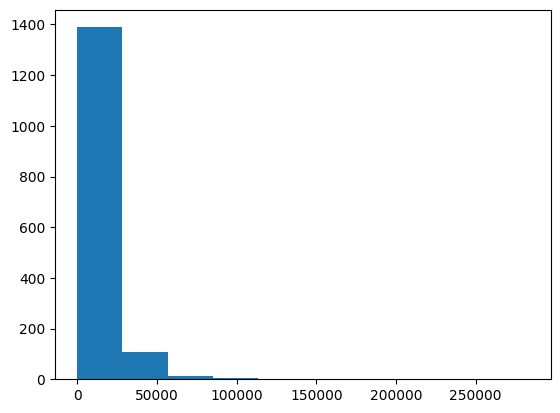

In [33]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [34]:
df[df['Total Interactions']>10000].count()

,0
Child,603
Smile,603
Female,603
Male,603
PeopleNumber,603
Text,603
close_up,603
Indoors,603
Outdoors,603
dominantColor,603


In [35]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]

In [36]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

,0
0,4.593569
1,3.093195
2,3.393552
3,4.390779
4,5.781499
...,...
1549,4.531411
1550,21.638655
1551,7.973143
1552,10.924370


<ipython-input-37-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,1368.000000
mean,3.975115
std,5.105046
min,0.422789
25%,2.081844
50%,2.815274
75%,4.136985
max,139.164638


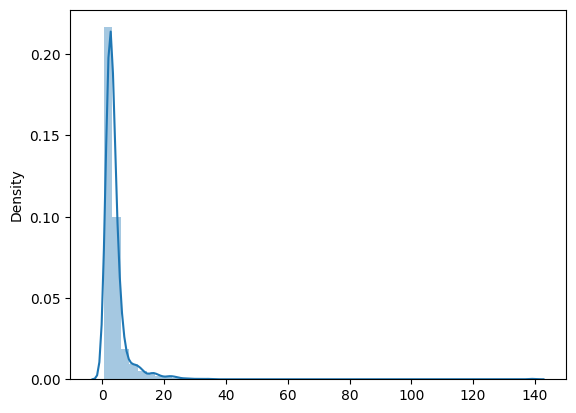

In [37]:
sns.distplot(y)
y.describe()

In [38]:
y[y<y.median()].count()

684

In [39]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,0,0
1550,1,1,1,1,2,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
1551,0,1,1,1,2,1,0,0,0,grey,0,HIGH,0,1,0,0,1,1,0,0
1552,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,1,0


In [40]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1550,1,1,1,1,2,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1551,0,1,1,1,2,1,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1552,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [41]:
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [42]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [43]:
X = change_types(X)

In [44]:
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [45]:
y_new = []

for i in y:
    if i<y.median():
        y_new.append('0')
    else:
        y_new.append('1')

In [46]:
print(y_new.count('0'))
print(y_new.count('1'))

684
684


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6642335766423357

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=10) # cv -->
scores.mean()

0.6242164018892229

In [50]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

0.7116788321167883
[[121  16]
 [ 63  74]]


In [51]:
scores = cross_val_score(clf, X, y_new, cv=10)
scores.mean()

0.7257996994418205

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6532846715328468

In [53]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv -->
scores.mean()

0.567174753112924

In [54]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7116788321167883

In [55]:
scores = cross_val_score(svc, X, y_new, cv=10)
scores.mean()

0.7265296264491198

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7043795620437956

In [57]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv -->
scores.mean()

0.7243398454272221

In [58]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.041266413601943525
Smile 0.0
Female 0.0
Male 0.0
PeopleNumber 0.0
Text 0.0
close_up 0.0
Indoors 0.0
Outdoors 0.0
LOGO 0.36773927591733613
ANGRY 0.08228756116592745
CALM 0.04631789304807711
CONFUSED 0.0
DISGUSTED 0.119723575412045
FEAR 0.0
HAPPY 0.0
SAD 0.0
SURPRISED 0.0
dominantColor_blue 0.01795853901114784
dominantColor_brown 0.0
dominantColor_cyan 0.0
dominantColor_green 0.0
dominantColor_grey 0.0
dominantColor_orange 0.14961276372533555
dominantColor_pink 0.0
dominantColor_purple 0.0
dominantColor_red 0.058029372400836644
dominantColor_white 0.0
dominantColor_yellow 0.0
Contrast_HIGH 0.0
Contrast_LOW 0.11706460571735072


In [59]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
LOGO,0.367739
dominantColor_orange,0.149613
DISGUSTED,0.119724
Contrast_LOW,0.117065
ANGRY,0.082288
dominantColor_red,0.058029
CALM,0.046318
Child,0.041266
dominantColor_blue,0.017959
Outdoors,0.000000
